# Titanic : Machine Learning from Disaster

### Predict survival on the Titanic

* Defining the problem statement
* Collecting the data
* Exploratory data analysis
* Feature engineering
* Feature selection
* Modelling
* Testing

# 1. Defining the problem statement

Complete the analysis of what sorts of people were likely to survive.
<br>In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")


# 2. Collecting the data
training data set and testing data set are given by Kaggle you can download from kaggle directly [kaggle](https://www.kaggle.com/c/titanic/data).
### load train, test dataset using Pandas

In [2]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 3. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
* Survived : 0 = No, 1 = Yes
* pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp : # of siblings / spouses aboard the Titanic
* parch : # of parents / children aboard the Titanic
* ticket : Ticket number
* cabin : Cabin number
* embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### Total rows and columns
We can see that there are 891 rows and 12 columns in our training dataset.

In [4]:
test.head() # Survived  X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape  # (row, col) return

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()  # (col type, non-null count, dtype) return

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see that <b><i>Age</i></b> value is missing for many rows.<br>
Out of 891 rows, the <b><i>Age</i></b> value is present only in 714 rows.<br>
Similarly, <b><i>Cabin</i></b> values are also missing in many rows. Only 204 out of 891 rows have <b><i>Cabin</i></b> values.

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 177 rows with missing <b><i>Age</i></b>, 687 rows with missing <b><i>Cabin</i></b> and 2 rows with missing <b><i>Embarked</b></i> information.

### import python lib for visualization

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set()  # setting seaborn default for plots

### Bar Chart for Categorical Features
* Pclass
* Sex
* SibSp (# of siblings and spouse)
* Parch (# of parents and children)
* Embarked
* Cabin

In [12]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))


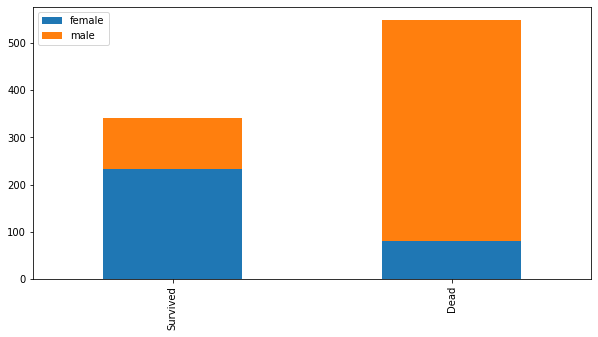

In [13]:
bar_chart('Sex')

The Chart confirms <b>Women</b> more likely survived than <b>Men</b>

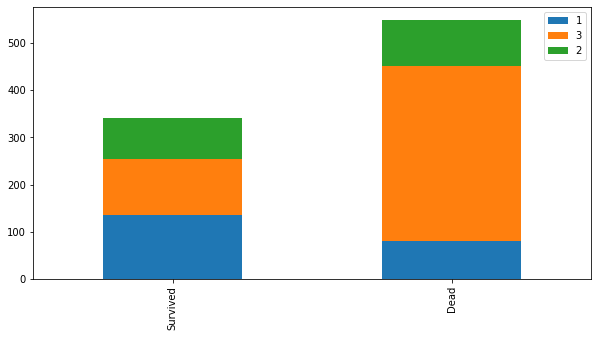

In [14]:
bar_chart('Pclass')

The Chart confirms <b>1st class</b> more likely survived than <b>other classes</b><br>
The Chart confirms <b>3rd class</b> more likely dead than <b>other classes</b>

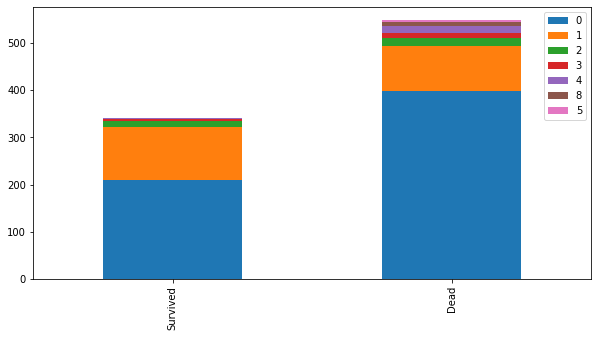

In [15]:
bar_chart('SibSp')

The Chart confirms <b>a person aboarded with more than 2 siblings or spouse</b> more likely dead<br>
The Chart confirms <b>a person aboarded without siblings or spouse</b> more likely dead

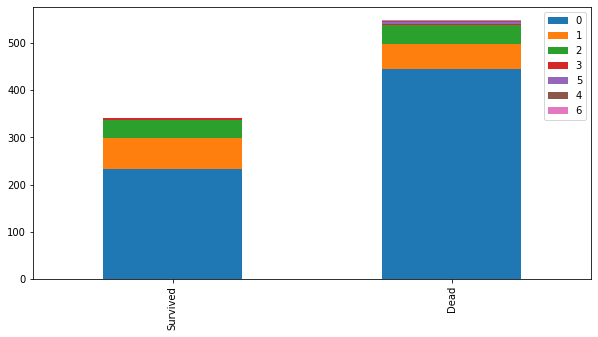

In [16]:
bar_chart('Parch')

The Chart confirms <b>a person aboarded with more than 2 parents or children</b> more likely dead<br>
The Chart confirms <b>a person aboarded alone</b> more likely dead

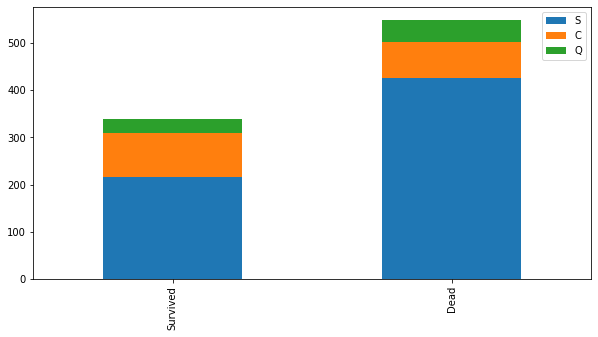

In [17]:
bar_chart('Embarked')

The Chart confirms <b>a person aboarded from C</b> slightly more likely survived<br>
The Chart confirms <b>a person aboarded from Q</b> more likely dead<br>
The Chart confirms <b>a person aboarded from S</b> more likely dead

# Reference
This notebook is created by learning from the following notebooks:
* [Mukesh Chapagain Titanic Solution: A Beginner's Guide](https://www.kaggle.com/code/chapagain/titanic-solution-a-beginner-s-guide/notebook?scriptVersionId=1473689)
* [How to score 0.8134 in Titanic Kaggle Challenge](https://www.ahmedbesbes.com/blog/kaggle-titanic-competition)
* [Titanic: factors to survive](https://olegleyz.github.io/titanic_factors.html)

# Feature engineering
Feature engineering is the process of using domain knowledge of the data <br>
to create features (<b>feature vectors</b>) that make machine learning algorithms work.<br><br>
feature vector is an n-dimensional vector of numerical features that represent some object.<br>
Many algorithms in machine learning require a numerical representation of objects,<br>
since such representations facilitate processing and statistical analysis.
<br><br>
feature = column<br>
vector = row value(number)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4.1 how titanic sank?
sank from the bow of the ship where third class rooms located<br>
conclusion, Pclass is key feature for classifier

In [19]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [20]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 4.2 Name

In [21]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [22]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [23]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

<b>Title map</b><br>
Mr : 0<br>
Miss : 1<br>
Mrs : 2<br>
Others : 3<br>

In [24]:
title_mapping = {"Mr" : 0, "Miss" : 1, "Mrs" : 2,
                 "Master" : 3, "Dr" : 3, "Rev" : 3, "Col" : 3, "Major" : 3, "Mlle" : 3, "Countess" : 3,
                 "Ms" : 3, "Lady" : 3, "Jonkheer" : 3, "Dona" : 3, "Mme" : 3, "Capt" : 3, "Sir" : 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


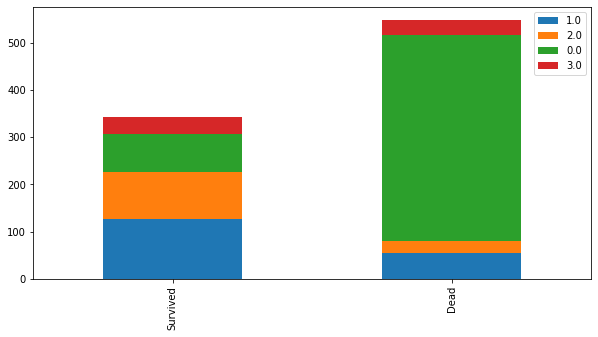

In [26]:
bar_chart('Title')

- 0 : Mr = 남성
- 1 : Miss = 여성
- 2 : Mrs = 여성

상대적으로 남성이 많이 죽고, 여성이 많이 살았다

In [27]:
#delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [29]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## 4.3 Sex
male : 0 female : 1

In [30]:
sex_mapping = {"male" : 0, "female" : 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

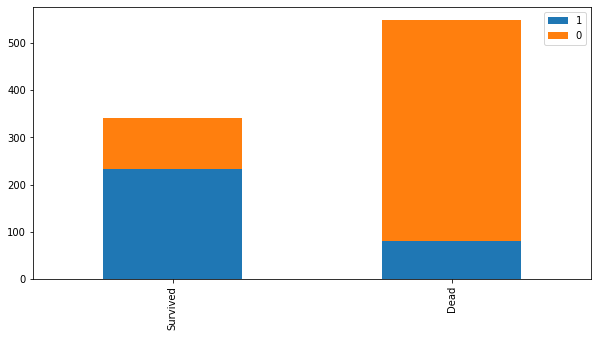

In [31]:
bar_chart('Sex')

## 4.4 Age
### 4.4.1 some age is missing

Let's use Title's median age for missing Age

In [32]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2.0


In [33]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [34]:
#facet = sns.FacetGrid(train, hue="Survived", aspect=4)
#facet.map(sns.kdeplot, 'Age', shade= True)
#facet.set(xlim=(0, train['Age'].max()))
#facet.add_legend()

plt.show()

In [35]:
#facet = sns.FacetGrid(train, hue="Survived", aspect=4)
#facet.map(sns.kdeplot, 'Age', shade=True)
#facet.set(xlim=(0, train['Age'].max()))
#facet.add_legend()
#plt.xlim(0,20)

In [36]:
#facet = sns.FacetGrid(train, hue="Survived", aspect=4)
#facet.map(sns.kdeplot, 'Age', shade=True)
#facet.set(xlim=(0, train['Age'].max()))
#facet.add_legend()
#plt.xlim(20,30)

In [37]:
#facet = sns.FacetGrid(train, hue="Survived", aspect=4)
#facet.map(sns.kdeplot, 'Age', shade=True)
#facet.set(xlim=(0, train['Age'].max()))
#facet.add_legend()
#plt.xlim(30,40)

In [38]:
#facet = sns.FacetGrid(train, hue="Survived", aspect=4)
#facet.map(sns.kdeplot, 'Age', shade=True)
#facet.set(xlim=(0, train['Age'].max()))
#facet.add_legend()
#plt.xlim(40,60)

In [39]:
#facet = sns.FacetGrid(train, hue="Survived", aspect=4)
#facet.map(sns.kdeplot, 'Age', shade=True)
#facet.set(xlim=(0, train['Age'].max()))
#facet.add_legend()
#plt.xlim(60)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        890 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


### 4.4.2 Binning
Binning/Converting Numerical Age to Categorical Variable<br><br>
feature vector map:<br>
child : 0<br>
young : 1<br>
adult : 2<br>
mid-age : 3<br>
senior : 4<br>

In [58]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [59]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


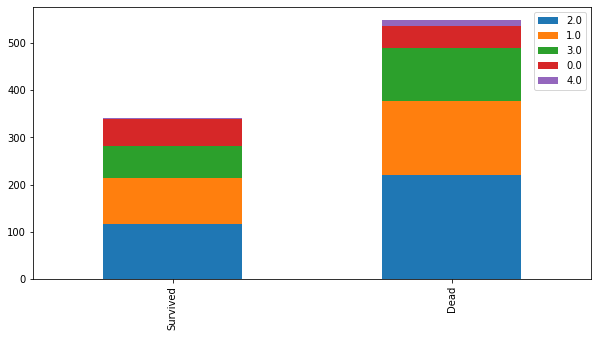

In [60]:
bar_chart('Age')

## 4.5 Embarked
### 4.5.1 filling missing values

<AxesSubplot:>

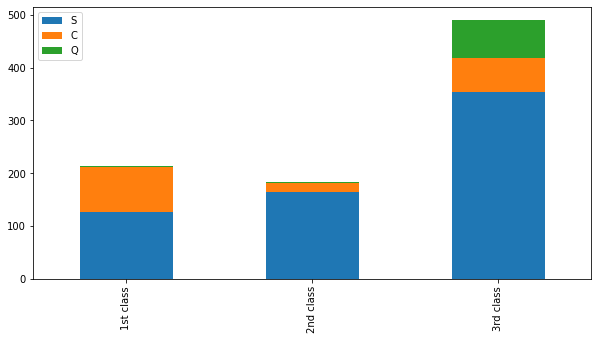

In [61]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark<br>
more than 50% of 2nd class are from S embark<br>
more than 50% of 3rd class are from S embark<br>
<br>
<b>fill out missing embark with S embark</b>

In [62]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [63]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


In [64]:
embarked_mapping = {"S" : 0, "C" : 1, "Q" : 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset["Embarked"].map(embarked_mapping)

## 4.6 Fare

In [65]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [66]:
# facet = sns.FacetGrid(train, hue="Survived", aspect=4)
# facet.map(sns.kdeplot, 'Fare', shade=True)
# facet.set(xlim=(0, train['Fare'].max()))
# facet.add_legend()

#plt.show()

In [67]:
# facet = sns.FacetGrid(train, hue="Survived", aspect=4)
# facet.map(sns.kdeplot, 'Fare', shade=True)
# facet.set(xlim=(0, train['Fare'].max()))
# facet.add_legend()
# plt.xlim(0,20)

In [68]:
# facet = sns.FacetGrid(train, hue="Survived", aspect=4)
# facet.map(sns.kdeplot, 'Fare', shade=True)
# facet.set(xlim=(0, train['Fare'].max()))
# facet.add_legend()
# plt.xlim(0,30)

In [69]:
# facet = sns.FacetGrid(train, hue="Survived", aspect=4)
# facet.map(sns.kdeplot, 'Fare', shade=True)
# facet.set(xlim=(0, train['Fare'].max()))
# facet.add_legend()
# plt.xlim(0)

In [70]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] =2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [71]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0.0


## 4.7 Cabin

In [72]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [73]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

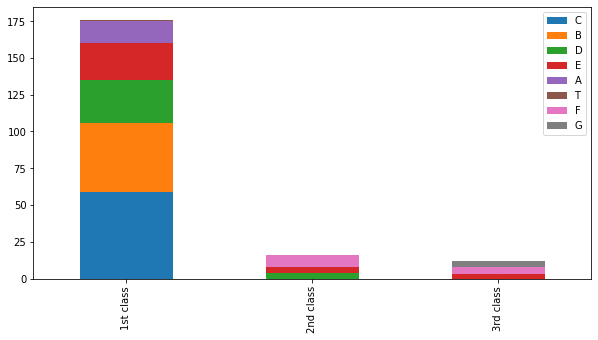

In [74]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize=(10,5))

In [75]:
cabin_mapping = {"A" : 0, "B" : 0.4, "C" : 0.8, "D" : 1.2, "E" : 1.6, "F" : 2, "G" : 2.4, "T" : 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [76]:
#fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

## 4.8 FamilySize

In [77]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [78]:
# facet = sns.FacetGrid(train, hue="Survived", aspect=4)
# facet.map(sns.kdeplot, 'FamilySize', shade=True)
# facet.set(xlim=(0, train['FamilySize'].max()))
# facet.add_legend()
# plt.xlim(0)

In [79]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
    dataset["FamilySize"] = dataset['FamilySize'].map(family_mapping)

In [80]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


In [81]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2,0.8


In [82]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [83]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [84]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,2.0,2.0,0.8,0,2.0,0.4
4,3,0,2.0,0.0,2.0,0,0.0,0.0
5,3,0,2.0,0.0,2.0,2,0.0,0.0
6,1,0,3.0,2.0,1.6,0,0.0,0.0
7,3,0,0.0,1.0,2.0,0,3.0,1.6
8,3,1,2.0,0.0,2.0,0,2.0,0.8
9,2,1,0.0,2.0,1.8,1,2.0,0.4


# References
This notebook is created by learning from the following notebooks:<br>
* [Mukesh Chapagain Titanic Solution: A Beginner's Guide](https://www.kaggle.com/code/chapagain/titanic-solution-a-beginner-s-guide/notebook?scriptVersionId=1473689)
* [How to score 0.8134 in Titanic Kaggle Challenge](https://www.ahmedbesbes.com/blog/kaggle-titanic-competition)
* [Titanic: factors to survive](https://olegleyz.github.io/titanic_factors.html)
* [Titanic Survivors Dataset and Data Wrangling](http://www.codeastar.com/data-wrangling/)